# Linear Regression Project
## Reading Data

In [232]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import KFold, cross_val_score

In [193]:
data = pd.read_csv('AmesHousing.tsv', delimiter = '\t')
data

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,2,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,3,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,4,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,5,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900
5,6,527105030,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,6,2010,WD,Normal,195500
6,7,527127150,120,RL,41.0,4920,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,213500
7,8,527145080,120,RL,43.0,5005,Pave,NaN,IR1,HLS,...,0,NaN,NaN,NaN,0,1,2010,WD,Normal,191500
8,9,527146030,120,RL,39.0,5389,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,3,2010,WD,Normal,236500
9,10,527162130,60,RL,60.0,7500,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,6,2010,WD,Normal,189000


## Feature Engineering
The data has some missing values.

In [194]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2930 entries, 0 to 2929
Data columns (total 82 columns):
Order              2930 non-null int64
PID                2930 non-null int64
MS SubClass        2930 non-null int64
MS Zoning          2930 non-null object
Lot Frontage       2440 non-null float64
Lot Area           2930 non-null int64
Street             2930 non-null object
Alley              198 non-null object
Lot Shape          2930 non-null object
Land Contour       2930 non-null object
Utilities          2930 non-null object
Lot Config         2930 non-null object
Land Slope         2930 non-null object
Neighborhood       2930 non-null object
Condition 1        2930 non-null object
Condition 2        2930 non-null object
Bldg Type          2930 non-null object
House Style        2930 non-null object
Overall Qual       2930 non-null int64
Overall Cond       2930 non-null int64
Year Built         2930 non-null int64
Year Remod/Add     2930 non-null int64
Roof Style         29

### Removing columns with too many missing values
For cols that have more than 5% missing, let's just drop them.

In [195]:
data_pruned = data.copy()

missing_values_ratio = data_pruned.isnull().sum() / len(data_pruned)
cols_to_drop = missing_values_ratio[missing_values_ratio > 0.05].index

data_pruned = data_pruned.drop(cols_to_drop, axis=1)
print(data_pruned.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2930 entries, 0 to 2929
Data columns (total 71 columns):
Order              2930 non-null int64
PID                2930 non-null int64
MS SubClass        2930 non-null int64
MS Zoning          2930 non-null object
Lot Area           2930 non-null int64
Street             2930 non-null object
Lot Shape          2930 non-null object
Land Contour       2930 non-null object
Utilities          2930 non-null object
Lot Config         2930 non-null object
Land Slope         2930 non-null object
Neighborhood       2930 non-null object
Condition 1        2930 non-null object
Condition 2        2930 non-null object
Bldg Type          2930 non-null object
House Style        2930 non-null object
Overall Qual       2930 non-null int64
Overall Cond       2930 non-null int64
Year Built         2930 non-null int64
Year Remod/Add     2930 non-null int64
Roof Style         2930 non-null object
Roof Matl          2930 non-null object
Exterior 1st       29

### Filling in values
For columns with less than 5% missing data (and more than 0), we can fill in with the most frequent value of that column (the mode).

In [196]:
missing_values_ratio = data_pruned.isnull().sum() / len(data_pruned)
cols_to_fill = missing_values_ratio[(missing_values_ratio < 0.05) & (missing_values_ratio >0)].index

most_common_values = data_pruned[cols_to_fill].mode().to_dict(orient='records')[0]
data_pruned[cols_to_fill] = data_pruned[cols_to_fill].fillna(most_common_values)
print(data_pruned.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2930 entries, 0 to 2929
Data columns (total 71 columns):
Order              2930 non-null int64
PID                2930 non-null int64
MS SubClass        2930 non-null int64
MS Zoning          2930 non-null object
Lot Area           2930 non-null int64
Street             2930 non-null object
Lot Shape          2930 non-null object
Land Contour       2930 non-null object
Utilities          2930 non-null object
Lot Config         2930 non-null object
Land Slope         2930 non-null object
Neighborhood       2930 non-null object
Condition 1        2930 non-null object
Condition 2        2930 non-null object
Bldg Type          2930 non-null object
House Style        2930 non-null object
Overall Qual       2930 non-null int64
Overall Cond       2930 non-null int64
Year Built         2930 non-null int64
Year Remod/Add     2930 non-null int64
Roof Style         2930 non-null object
Roof Matl          2930 non-null object
Exterior 1st       29

### Creating usable features from non-useable columns
The difference between the year sold and year built can be a useful feature.
The difference between the year sold and the year remodeled can be a useful feature.

In [197]:
data_pruned['Years Before Sale'] = data_pruned['Yr Sold'] - data_pruned['Year Built']
data_pruned['Years Since Remod'] = data_pruned['Yr Sold'] - data_pruned['Year Remod/Add']
data_pruned = data_pruned.drop(["Year Built", "Year Remod/Add", "Yr Sold"], axis = 1)

In [198]:
years_b_sale = data_pruned['Years Before Sale'] 
print(years_b_sale[years_b_sale<0])
years_b_remod = data_pruned['Years Since Remod'] 
print(years_b_remod[years_b_remod<0])

2180   -1
Name: Years Before Sale, dtype: int64
1702   -1
2180   -2
2181   -1
Name: Years Since Remod, dtype: int64


This calculation has produced some inconsistent data, let's remove those rows.

In [199]:
data_pruned = data_pruned.drop([1702, 2180, 2181], axis=0)

### Removing useless columns
Some columns dont help with the model, while others carry the same information as the price column.

In [200]:
data_pruned = data_pruned.drop(["PID", "Order", "Mo Sold", "Sale Condition", "Sale Type"], axis=1)
print(data_pruned.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2927 entries, 0 to 2929
Data columns (total 65 columns):
MS SubClass          2927 non-null int64
MS Zoning            2927 non-null object
Lot Area             2927 non-null int64
Street               2927 non-null object
Lot Shape            2927 non-null object
Land Contour         2927 non-null object
Utilities            2927 non-null object
Lot Config           2927 non-null object
Land Slope           2927 non-null object
Neighborhood         2927 non-null object
Condition 1          2927 non-null object
Condition 2          2927 non-null object
Bldg Type            2927 non-null object
House Style          2927 non-null object
Overall Qual         2927 non-null int64
Overall Cond         2927 non-null int64
Roof Style           2927 non-null object
Roof Matl            2927 non-null object
Exterior 1st         2927 non-null object
Exterior 2nd         2927 non-null object
Mas Vnr Type         2927 non-null object
Mas Vnr Area   

## Feature selection
Let's select the best columns to build the model on.

For numerical columns, we can use the correlation score, removing columns with low correlation, and columns that are correlated to each other (collinearity). We can also scale the data to identify colums with low variance that dont contribute meaningfully to the sale price.

For categorical columns, we can convert them to useable form using dummy encoding, provided they do not have too many different values (which would result in too many additional columns to the model).
### Selecting columns with enough correlation to Sale Price

In [201]:
data_numerical = data_pruned.select_dtypes(include=['int', 'float']).copy()
correlation_coeffs = numerical.corr()['SalePrice'].abs().sort_values()
print(correlation_coeffs)

BsmtFin SF 2         0.006127
Misc Val             0.019273
3Ssn Porch           0.032268
Bsmt Half Bath       0.035875
Low Qual Fin SF      0.037629
Pool Area            0.068438
MS SubClass          0.085128
Overall Cond         0.101540
Screen Porch         0.112280
Kitchen AbvGr        0.119760
Enclosed Porch       0.128685
Bedroom AbvGr        0.143916
Bsmt Unf SF          0.182751
Lot Area             0.267520
2nd Flr SF           0.269601
Bsmt Full Bath       0.276258
Half Bath            0.284871
Open Porch SF        0.316262
Wood Deck SF         0.328183
BsmtFin SF 1         0.439284
Fireplaces           0.474831
TotRms AbvGrd        0.498574
Mas Vnr Area         0.506983
Years Since Remod    0.534985
Full Bath            0.546118
Years Before Sale    0.558979
1st Flr SF           0.635185
Garage Area          0.641425
Total Bsmt SF        0.644012
Garage Cars          0.648361
Gr Liv Area          0.717596
Overall Qual         0.801206
SalePrice            1.000000
Name: Sale

We will only keep columns with a correlation coeff greater than 0.45.

In [202]:
cols_to_keep = correlation_coeffs[correlation_coeffs>0.45].index
data_numerical = data_numerical[cols_to_keep]
print(data_numerical.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2927 entries, 0 to 2929
Data columns (total 13 columns):
Fireplaces           2927 non-null int64
TotRms AbvGrd        2927 non-null int64
Mas Vnr Area         2927 non-null float64
Years Since Remod    2927 non-null int64
Full Bath            2927 non-null int64
Years Before Sale    2927 non-null int64
1st Flr SF           2927 non-null int64
Garage Area          2927 non-null float64
Total Bsmt SF        2927 non-null float64
Garage Cars          2927 non-null float64
Gr Liv Area          2927 non-null int64
Overall Qual         2927 non-null int64
SalePrice            2927 non-null int64
dtypes: float64(4), int64(9)
memory usage: 320.1 KB
None


### Removing colinear columns

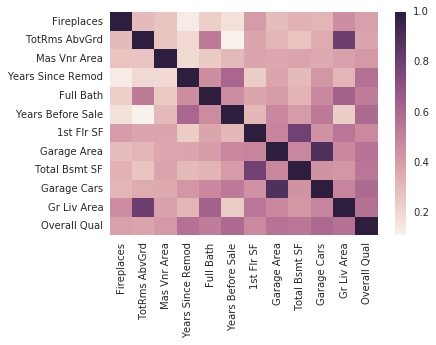

In [203]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.heatmap(data_numerical.drop('SalePrice', axis=1).corr().abs())

It seems that Gr Liv Area and Roms Abg Grnd are strongly correlated, as expected. Similarly, Garage area and cars provide the same information. 
Let's keep the continuous column for both these cases, and drop the other.

In [204]:
data_numerical = data_numerical.drop(['TotRms AbvGrd', 'Garage Cars'], axis=1)

### Inspecting variance of remaining numerical columns

In [205]:
data_unit = (data_numerical - data_numerical.min())/(data_numerical.max() - data_numerical.min())
variances = data_unit.var().sort_values()
print(variances)

Total Bsmt SF        0.005022
1st Flr SF           0.007742
Gr Liv Area          0.008794
SalePrice            0.011593
Mas Vnr Area         0.012250
Full Bath            0.019077
Garage Area          0.020827
Overall Qual         0.024461
Fireplaces           0.026216
Years Before Sale    0.049585
Years Since Remod    0.120806
dtype: float64


Let's remove the three columns that have the lowest variance, below 0.01.

In [206]:
cols_to_keep = variances[variances>0.01].index
data_numerical = data_numerical[cols_to_keep]
print(data_numerical.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2927 entries, 0 to 2929
Data columns (total 8 columns):
SalePrice            2927 non-null int64
Mas Vnr Area         2927 non-null float64
Full Bath            2927 non-null int64
Garage Area          2927 non-null float64
Overall Qual         2927 non-null int64
Fireplaces           2927 non-null int64
Years Before Sale    2927 non-null int64
Years Since Remod    2927 non-null int64
dtypes: float64(2), int64(6)
memory usage: 205.8 KB
None


### Selecting best categorical columns

In [207]:
data_categorical = data_pruned.select_dtypes(include=['object']).copy()
print(data_categorical.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2927 entries, 0 to 2929
Data columns (total 32 columns):
MS Zoning         2927 non-null object
Street            2927 non-null object
Lot Shape         2927 non-null object
Land Contour      2927 non-null object
Utilities         2927 non-null object
Lot Config        2927 non-null object
Land Slope        2927 non-null object
Neighborhood      2927 non-null object
Condition 1       2927 non-null object
Condition 2       2927 non-null object
Bldg Type         2927 non-null object
House Style       2927 non-null object
Roof Style        2927 non-null object
Roof Matl         2927 non-null object
Exterior 1st      2927 non-null object
Exterior 2nd      2927 non-null object
Mas Vnr Type      2927 non-null object
Exter Qual        2927 non-null object
Exter Cond        2927 non-null object
Foundation        2927 non-null object
Bsmt Qual         2927 non-null object
Bsmt Cond         2927 non-null object
Bsmt Exposure     2927 non-null obj

Regardless of the information contained in the column, they can only be useable if the number of unique values in each is small enough (less than 5) that they can be converted into dummy encoding.

In [208]:
unique_values = data_categorical.apply(lambda col: len(col.value_counts()))
unique_values

MS Zoning          7
Street             2
Lot Shape          4
Land Contour       4
Utilities          3
Lot Config         5
Land Slope         3
Neighborhood      28
Condition 1        9
Condition 2        8
Bldg Type          5
House Style        8
Roof Style         6
Roof Matl          8
Exterior 1st      16
Exterior 2nd      17
Mas Vnr Type       5
Exter Qual         4
Exter Cond         5
Foundation         6
Bsmt Qual          5
Bsmt Cond          5
Bsmt Exposure      4
BsmtFin Type 1     6
BsmtFin Type 2     6
Heating            6
Heating QC         5
Central Air        2
Electrical         5
Kitchen Qual       5
Functional         8
Paved Drive        3
dtype: int64

In [209]:
cols_to_drop = unique_values[unique_values > 5].index
data_categorical = data_categorical.drop(cols_to_drop, axis=1)
print(data_categorical.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2927 entries, 0 to 2929
Data columns (total 18 columns):
Street           2927 non-null object
Lot Shape        2927 non-null object
Land Contour     2927 non-null object
Utilities        2927 non-null object
Lot Config       2927 non-null object
Land Slope       2927 non-null object
Bldg Type        2927 non-null object
Mas Vnr Type     2927 non-null object
Exter Qual       2927 non-null object
Exter Cond       2927 non-null object
Bsmt Qual        2927 non-null object
Bsmt Cond        2927 non-null object
Bsmt Exposure    2927 non-null object
Heating QC       2927 non-null object
Central Air      2927 non-null object
Electrical       2927 non-null object
Kitchen Qual     2927 non-null object
Paved Drive      2927 non-null object
dtypes: object(18)
memory usage: 434.5+ KB
None


To determine the variance of these categorical columns, and eliminate the ones that have low variance, we can identify if any have 95% of the values belonging to the same category.

In [213]:
cols_to_drop = []
for col in data_categorical.columns:
    values = data_categorical[col].value_counts()
    if (values.max() / values.sum())>.95:
        cols_to_drop.append(col)
        
cols_to_drop

['Street', 'Utilities', 'Land Slope']

In [214]:
data_categorical = data_categorical.drop(cols_to_drop, axis=1)
print(data_categorical.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2927 entries, 0 to 2929
Data columns (total 15 columns):
Lot Shape        2927 non-null object
Land Contour     2927 non-null object
Lot Config       2927 non-null object
Bldg Type        2927 non-null object
Mas Vnr Type     2927 non-null object
Exter Qual       2927 non-null object
Exter Cond       2927 non-null object
Bsmt Qual        2927 non-null object
Bsmt Cond        2927 non-null object
Bsmt Exposure    2927 non-null object
Heating QC       2927 non-null object
Central Air      2927 non-null object
Electrical       2927 non-null object
Kitchen Qual     2927 non-null object
Paved Drive      2927 non-null object
dtypes: object(15)
memory usage: 365.9+ KB
None


In [215]:
for col in data_categorical.columns:
    data_categorical[col] = data_categorical[col].astype('category')
    col_dummies = pd.get_dummies(data_categorical[col], prefix=col)
    data_categorical = pd.concat([data_categorical, col_dummies], axis=1)
    del data_categorical[col]

print(data_categorical.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2927 entries, 0 to 2929
Data columns (total 66 columns):
Lot Shape_IR1           2927 non-null uint8
Lot Shape_IR2           2927 non-null uint8
Lot Shape_IR3           2927 non-null uint8
Lot Shape_Reg           2927 non-null uint8
Land Contour_Bnk        2927 non-null uint8
Land Contour_HLS        2927 non-null uint8
Land Contour_Low        2927 non-null uint8
Land Contour_Lvl        2927 non-null uint8
Lot Config_Corner       2927 non-null uint8
Lot Config_CulDSac      2927 non-null uint8
Lot Config_FR2          2927 non-null uint8
Lot Config_FR3          2927 non-null uint8
Lot Config_Inside       2927 non-null uint8
Bldg Type_1Fam          2927 non-null uint8
Bldg Type_2fmCon        2927 non-null uint8
Bldg Type_Duplex        2927 non-null uint8
Bldg Type_Twnhs         2927 non-null uint8
Bldg Type_TwnhsE        2927 non-null uint8
Mas Vnr Type_BrkCmn     2927 non-null uint8
Mas Vnr Type_BrkFace    2927 non-null uint8
Mas Vnr Type_

## Combining data, training and testing model

In [221]:
final_data = pd.concat([data_numerical, data_categorical], axis=1)
features = final_data.columns.drop("SalePrice")
target = 'SalePrice'
print(final_data.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2927 entries, 0 to 2929
Data columns (total 74 columns):
SalePrice               2927 non-null int64
Mas Vnr Area            2927 non-null float64
Full Bath               2927 non-null int64
Garage Area             2927 non-null float64
Overall Qual            2927 non-null int64
Fireplaces              2927 non-null int64
Years Before Sale       2927 non-null int64
Years Since Remod       2927 non-null int64
Lot Shape_IR1           2927 non-null uint8
Lot Shape_IR2           2927 non-null uint8
Lot Shape_IR3           2927 non-null uint8
Lot Shape_Reg           2927 non-null uint8
Land Contour_Bnk        2927 non-null uint8
Land Contour_HLS        2927 non-null uint8
Land Contour_Low        2927 non-null uint8
Land Contour_Lvl        2927 non-null uint8
Lot Config_Corner       2927 non-null uint8
Lot Config_CulDSac      2927 non-null uint8
Lot Config_FR2          2927 non-null uint8
Lot Config_FR3          2927 non-null uint8
Lot Confi

In [224]:
features

Index(['Mas Vnr Area', 'Full Bath', 'Garage Area', 'Overall Qual',
       'Fireplaces', 'Years Before Sale', 'Years Since Remod', 'Lot Shape_IR1',
       'Lot Shape_IR2', 'Lot Shape_IR3', 'Lot Shape_Reg', 'Land Contour_Bnk',
       'Land Contour_HLS', 'Land Contour_Low', 'Land Contour_Lvl',
       'Lot Config_Corner', 'Lot Config_CulDSac', 'Lot Config_FR2',
       'Lot Config_FR3', 'Lot Config_Inside', 'Bldg Type_1Fam',
       'Bldg Type_2fmCon', 'Bldg Type_Duplex', 'Bldg Type_Twnhs',
       'Bldg Type_TwnhsE', 'Mas Vnr Type_BrkCmn', 'Mas Vnr Type_BrkFace',
       'Mas Vnr Type_CBlock', 'Mas Vnr Type_None', 'Mas Vnr Type_Stone',
       'Exter Qual_Ex', 'Exter Qual_Fa', 'Exter Qual_Gd', 'Exter Qual_TA',
       'Exter Cond_Ex', 'Exter Cond_Fa', 'Exter Cond_Gd', 'Exter Cond_Po',
       'Exter Cond_TA', 'Bsmt Qual_Ex', 'Bsmt Qual_Fa', 'Bsmt Qual_Gd',
       'Bsmt Qual_Po', 'Bsmt Qual_TA', 'Bsmt Cond_Ex', 'Bsmt Cond_Fa',
       'Bsmt Cond_Gd', 'Bsmt Cond_Po', 'Bsmt Cond_TA', 'Bsmt Exposure_

### Holdout Validation

In [225]:
train = final_data[:1460]
test = final_data[1460:]
lm = LinearRegression()
lm.fit(train[features], train[target])
rmse = mean_squared_error(lm.predict(test[features]), test[target])**0.5
rmse

35575.99662750936

### Simple Cross validation

In [230]:
final_data_shuffled = final_data.sample(frac=1)
fold_one = final_data[:1460]
fold_two = final_data[1460:]
lm = LinearRegression()

lm.fit(fold_one[features], fold_one[target])
rmse_1 = mean_squared_error(lm.predict(fold_two[features]), fold_two[target])**0.5

lm.fit(fold_two[features], fold_two[target])
rmse_2 = mean_squared_error(lm.predict(fold_one[features]), fold_one[target])**0.5
avg_rmse = (rmse_1+rmse_2) / 2
avg_rmse

33610.48023080901

### K-fold cross validation

In [240]:
lm = LinearRegression()
kf = KFold(5, shuffle=True)
mses = cross_val_score(lm, final_data[features], final_data[target], cv=kf, scoring='neg_mean_squared_error')
sum((mses*-1)**.5) / len(mses)

32802.55327975972

In [241]:
final_data['SalePrice'].mean()

180766.5664502904